In [1]:
import pandas as pd

In [2]:
import seaborn as srn

In [3]:
import statistics as sts

In [61]:
#Definindo a variável e lendo o arquivo csv
Dataset = pd.read_csv("tempo.csv", sep = ";")

In [9]:
#Exibindo o Dataframe
Dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [8]:
#Número de Linhas e Colunas do Dt
Dataset.shape

(14, 5)

In [11]:
#Iniciando a análise exploratória da parte categórica
Grupo = Dataset.groupby(['Aparencia']).size()
Grupo

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

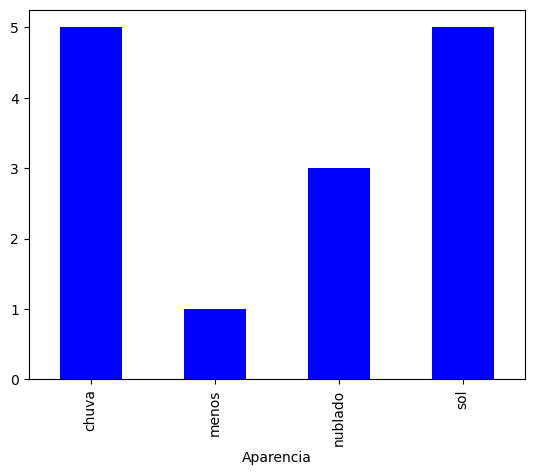

In [13]:
#Mostrando Gráfico com a biblioteca Seaborn
Grupo.plot.bar(color='blue')

In [15]:
Grupo = Dataset.groupby(['Vento']).size()
Grupo

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

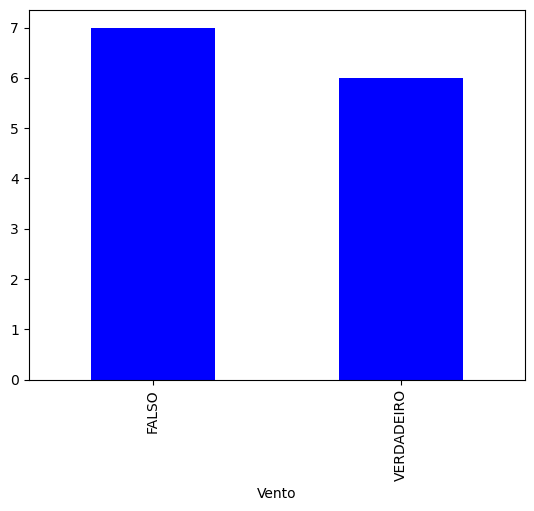

In [18]:
Grupo.plot.bar(color='blue')

In [20]:
Grupo = Dataset.groupby(['Jogar']).size()
Grupo

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

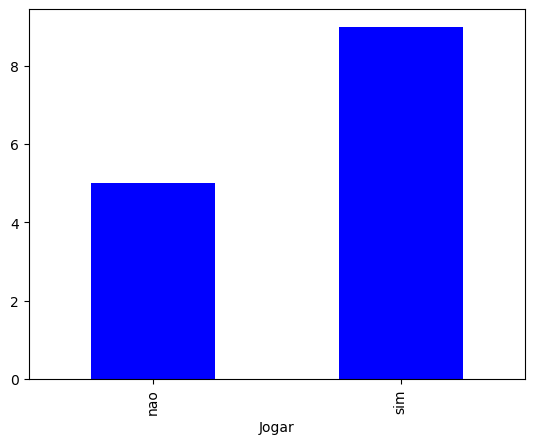

In [21]:
Grupo.plot.bar(color='blue')

In [22]:
#Analise exploratoria dos dados numericos
Dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [26]:
Dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [27]:
#Visualizando quantidade de dados nulos
Dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [28]:
#Visualizando a coluna Vento
Grupo = Dataset.groupby(['Vento']).size()
Grupo

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [29]:
#Somando os valores nulos
Dataset['Vento'].isnull() .sum()

1

In [34]:
#Trocando os valores nulos pela moda
Dataset['Vento'].fillna('FALSO' ,inplace=True)

In [35]:
#Verificando se os valores nulos ainda existem
Dataset['Vento'].isnull() .sum()

0

In [36]:
#Mostrando os dados da coluna Umidade
Dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [37]:
#Calculando a mediana com sts
mediana = sts.median(Dataset['Umidade'])
mediana

85.5

In [38]:
#Filtrando os nulos e substituindo pela mediana
Dataset['Umidade'].fillna(mediana, inplace=True)

In [39]:
#Verificando se ainda existem dados nulos na coluna Umidade
Dataset['Umidade'].isnull().sum()

0

In [40]:
#Verificando se ainda existem dados nulos.
Dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [42]:
#Verificando se existe algum valor menor que -130 ou maior que 130
Dataset.loc[(Dataset['Temperatura'] < -130) | (Dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [43]:
#Calculando a mediana
mediana = sts.median(Dataset['Temperatura'])
mediana

73.5

In [44]:
#Substituindo o valor da coluna Temperatura maior que 130 pela mediana
Dataset.loc[(Dataset['Temperatura'] < -130) | (Dataset['Temperatura'] > 130)] = mediana

In [45]:
#Verificando se ainda existem valores errados
Dataset.loc[(Dataset['Temperatura'] < -130) | (Dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [46]:
Dataset['Umidade'].describe()

count     14.000000
mean      87.928571
std       33.425495
min       65.000000
25%       70.875000
50%       82.500000
75%       89.000000
max      200.000000
Name: Umidade, dtype: float64

In [47]:
#Verificando se existem alguma temperatura maior que 100 ou menos que 0
Dataset.loc[(Dataset['Umidade'] < 0) | (Dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [51]:
#Calculando a mediana de Temperatura
mediana = sts.median(Dataset['Umidade'])
mediana

77.5

In [49]:
#Substituindo valores errados por mediana
Dataset.loc[(Dataset['Umidade'] < 0) | (Dataset['Umidade'] > 100)] = mediana

In [59]:
#Verificando se os valores errados foram alterados.
Dataset.loc[(Dataset['Umidade'] < 0) | (Dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
